<a href="https://colab.research.google.com/github/pravin-pandey/brainwaves/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, sklearn
#import config

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
data_set=pandas.read_excel('dataset.xlsx',index_col=False)
work_day=['hectic_and_nsleep', 'hectic_and_sleep', 'nhectic_and_nsleep', 'nhectic_and_sleep']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

,ID,Diagnosed_Sleep_disorder,Avg_Work_Hrs_Week,Avg_Work_Hrs_Day,Alert_at_Work,Mentally_Drained,Phys_Drained,Emergencies,Lack_of_control,Sleep_loss,Job_pressure,BreakTime,TimeOff
0,1,2,40,8,2,2,1,3,2,2,2,3,4
1,2,2,40,8,3,2,1,1,1,1,1,1,1
2,3,1,41,8.2,3,3,3,2,3,2,2,2,2
3,4,2,40,8,3,3,2,4,3,3,1,3,3
4,5,2,40,8,2,3,3,4,2,4,4,4,2


In [0]:
data_set = data_set.dropna()

In [7]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,stratify=None)

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (351, 13)
Test data size: (88, 13)


In [0]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=work_day,title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Score: 1.000
Test score: 0.375
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[3. 2. 3. 3. 2. 1. 2. 2. 1. 1. 2. 3. 2. 3. 2. 2. 2. 4. 4. 2. 3. 3. 1. 1.
 3. 3. 2. 4. 1. 2. 1. 1. 4. 1. 4. 2. 1. 2. 2. 1. 1. 1. 4. 2. 2. 4. 1. 2.
 4. 1. 1. 4. 2. 2. 3. 2. 3. 2. 4. 4. 3. 2. 3. 3. 2. 3. 2. 2. 1. 1. 2. 2.
 3. 1. 2. 4. 3. 4. 1. 4. 1. 4. 1. 4. 1. 3. 3. 3.]

Predicted Test dataset labels: 
[3. 2. 1. 3. 2. 2. 1. 1. 2. 1. 2. 4. 2. 3. 2. 3. 2. 3. 4. 2. 2. 3. 2. 2.
 4. 3. 2. 1. 1. 1. 2. 2. 3. 3. 2. 1. 3. 2. 2. 1. 2. 1. 2. 3. 2. 2. 2. 2.
 4. 2. 4. 3. 3. 2. 4. 1. 4. 2. 4. 2. 2. 2. 1. 2. 3. 4. 1. 2. 2. 1. 4. 3.
 2. 2. 3. 4. 2. 3. 1. 4. 2. 4. 4. 2. 2. 2. 2. 1.]


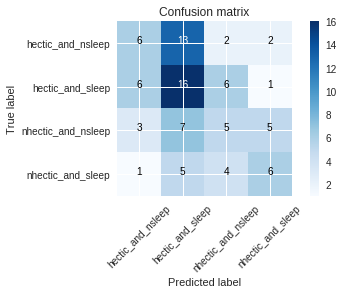

In [12]:
svm=SVC(C=50)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,work_day)